In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
from pymongo import MongoClient
"""
!pip install pymongo
!pip install "pymongo[srv]"
!pip install dnspython
"""

'\n!pip install pymongo\n!pip install "pymongo[srv]"\n!pip install dnspython\n'

In [ ]:
# Establish a connection to a MongoDB Atlas Cluster with Secured Authentication using User Name and Password of the Database
client = MongoClient("mongodb+srv://<username>:<password>@<your-cluster-url>/") # Replace the string with your MongoDB cluster string
# Create Database and specify name of database
db = client.get_database('Algerian_fires_db')
# Create a collection
records = db.fire_records

In [5]:
# Create Dataframe and Read the dataset using Pandas
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
# Convert Dataframe into Dictionary as MongoDB stores data in records/documents
data = dataset.to_dict(orient = 'records')

In [7]:
# Insert records in the dataset into MongoDB collection "hotel_records"
db.fire_records.insert_many(data)
print("All the Data has been Exported to MongoDB Successfully")

All the Data has been Exported to MongoDB Successfully


In [8]:
#Load all records from MongoDB using find()
all_records = records.find()
print(all_records)

In [9]:
#Convert Cursor Object into list
list_cursor = list(all_records)

In [10]:
#Convert list into Dataframe
df = pd.DataFrame(list_cursor)
df.drop('_id', axis=1, inplace=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
2702,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
2703,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
2704,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2706 entries, 0 to 2705
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          2706 non-null   object
 1   month        2695 non-null   object
 2   year         2695 non-null   object
 3   Temperature  2695 non-null   object
 4    RH          2695 non-null   object
 5    Ws          2695 non-null   object
 6   Rain         2695 non-null   object
 7   FFMC         2695 non-null   object
 8   DMC          2695 non-null   object
 9   DC           2695 non-null   object
 10  ISI          2695 non-null   object
 11  BUI          2695 non-null   object
 12  FWI          2695 non-null   object
 13  Classes      2684 non-null   object
dtypes: object(14)
memory usage: 296.1+ KB


In [12]:
# Columns which has null values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN
321,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN
386,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN
701,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
892,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN
907,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1016,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN
1192,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [14]:
df.isnull().sum()

day             0
month          11
year           11
Temperature    11
 RH            11
 Ws            11
Rain           11
FFMC           11
DMC            11
DC             11
ISI            11
BUI            11
FWI            11
Classes        22
Region          0
dtype: int64

In [15]:
# Remove null or na values rows
df =df.dropna().reset_index(drop=True) 
df.shape

(2684, 15)

In [16]:
# Column which has string
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [17]:
#remove 122th column
df= df.drop(122).reset_index(drop=True)

In [18]:
# List out column names to check 
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [19]:
# Spaces were fixed in the column names
df.columns = df.columns.str.strip()
df.columns 

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [20]:
# Check first few rows
print(df.head())

# Remove non-numeric values and missing values
df[['month', 'day', 'year', 'Temperature', 'RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature', 'RH', 'Ws']].apply(pd.to_numeric, errors='coerce')

# Fill or drop NaNs
df.dropna(subset=['month', 'day', 'year', 'Temperature', 'RH', 'Ws'], inplace=True)

# Convert to int
df[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

  day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

       Classes  Region  
0  not fire          1  
1  not fire          1  
2  not fire          1  
3  not fire          1  
4  not fire          1  


In [21]:
objects = [features for features in df.columns if df[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)

In [22]:
# Final datatypes check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2673 entries, 0 to 2682
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          2673 non-null   int64  
 1   month        2673 non-null   int64  
 2   year         2673 non-null   int64  
 3   Temperature  2673 non-null   int64  
 4   RH           2673 non-null   int64  
 5   Ws           2673 non-null   int64  
 6   Rain         2673 non-null   float64
 7   FFMC         2673 non-null   float64
 8   DMC          2673 non-null   float64
 9   DC           2673 non-null   float64
 10  ISI          2673 non-null   float64
 11  BUI          2673 non-null   float64
 12  FWI          2673 non-null   float64
 13  Classes      2673 non-null   object 
 14  Region       2673 non-null   int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 334.1+ KB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,2673.0,15.761317,8.825990,1.0,8.0,16.0,23.0,31.0
month,2673.0,7.502058,1.112705,6.0,7.0,8.0,8.0,9.0
year,2673.0,2012.000000,0.000000,2012.0,2012.0,2012.0,2012.0,2012.0
Temperature,2673.0,32.152263,3.621244,22.0,30.0,32.0,35.0,42.0
RH,2673.0,62.041152,14.800387,21.0,52.0,63.0,74.0,90.0
Ws,2673.0,15.493827,2.806120,6.0,14.0,15.0,17.0,29.0
Rain,2673.0,0.762963,1.999455,0.0,0.0,0.0,0.5,16.8
FFMC,2673.0,77.842387,14.322764,28.6,71.4,83.3,88.3,96.0
DMC,2673.0,14.680658,12.369827,0.7,5.8,11.3,20.9,65.9
DC,2673.0,49.430864,47.576328,6.9,10.5,33.1,71.0,220.4


In [24]:
# Check Unique values of target variable
df.Classes.value_counts()

Classes
fire             1441
not fire         1111
fire               44
fire               22
not fire           22
not fire           11
not fire           11
not fire           11
Name: count, dtype: int64

In [25]:
# Strip mispaced values
df.Classes = df.Classes.str.strip()

In [26]:
df.Classes.value_counts()

Classes
fire        1507
not fire    1166
Name: count, dtype: int64

In [27]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


In [28]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
2679,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
2680,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
2681,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [29]:
df.to_csv('Algerian_forest_fires_dataset_CLEANED.csv', index=False)

In [30]:
#Droping Year features 
df1 = df.drop(['day','month','year'], axis=1)

In [31]:
# Encoding Not fire as 0 and Fire as 1
df1['Classes']= np.where(df1['Classes']== 'not fire',0,1)

In [32]:
# Check counts
df1.Classes.value_counts()

Classes
1    1507
0    1166
Name: count, dtype: int64

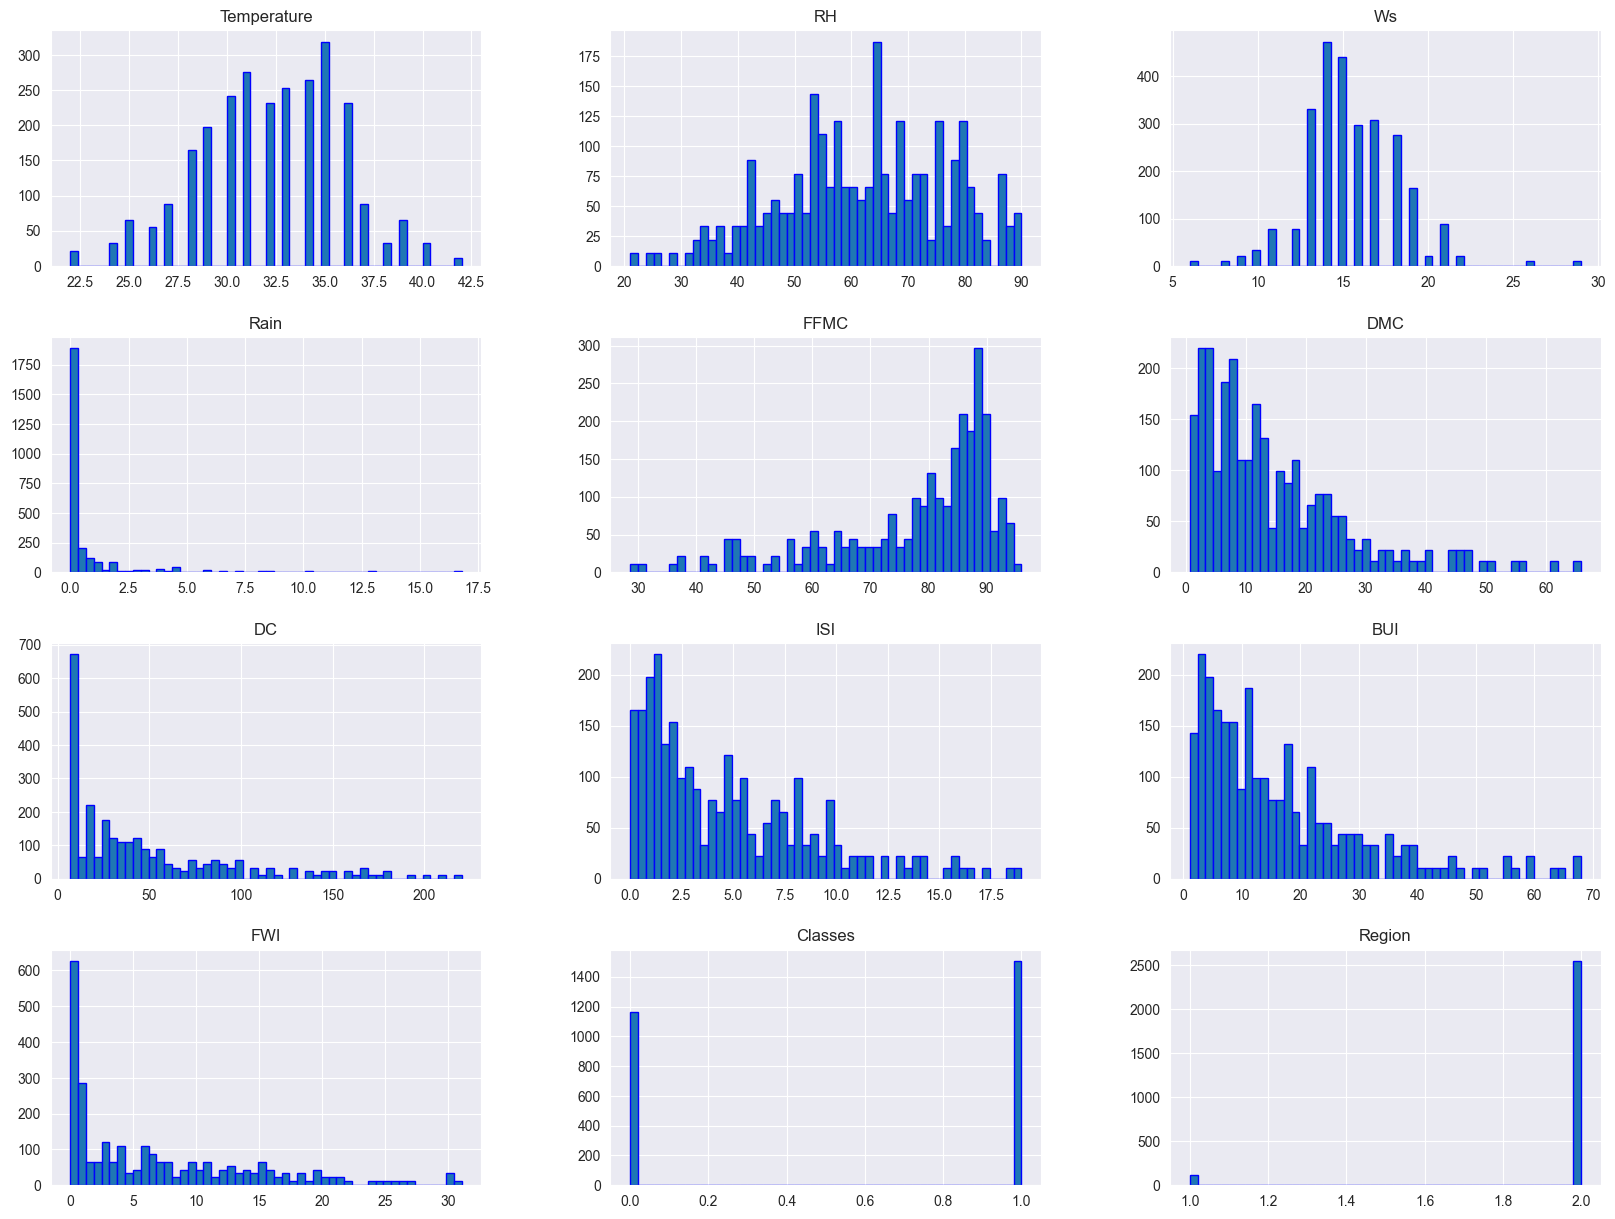

In [33]:
# PLot density plot for all features
sns.set_style("darkgrid")  # Seaborn style
df1.hist(bins=50, figsize=(20, 15), edgecolor='b')  # Use 'edgecolor' instead of 'ec'
plt.show()

In [34]:
# Percentage for PieChart
percentage = df.Classes.value_counts(normalize=True)*100
percentage

Classes
fire        56.378601
not fire    43.621399
Name: proportion, dtype: float64

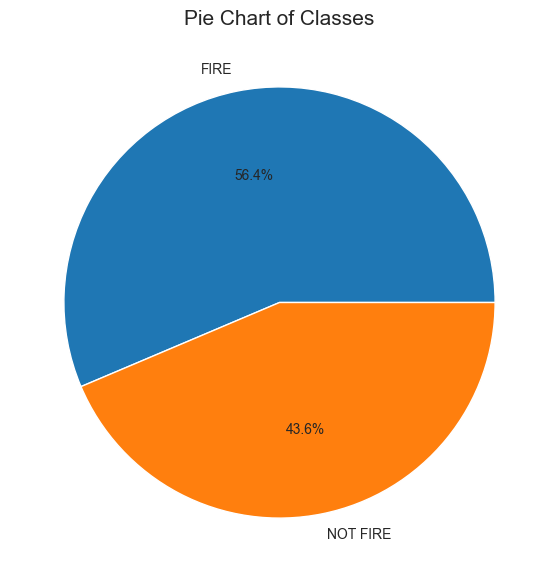

In [35]:
#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show() 

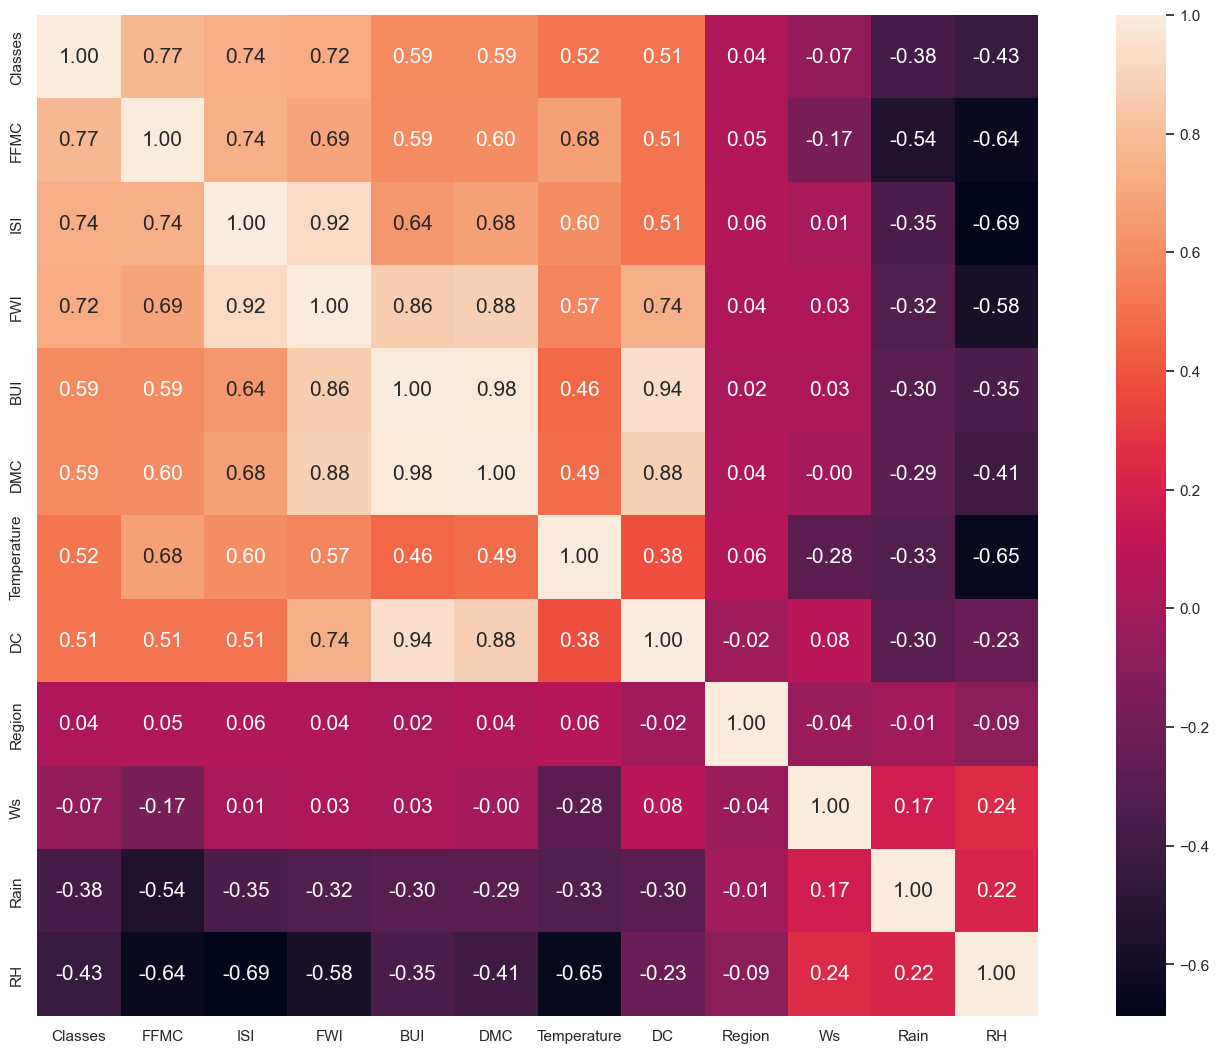

In [36]:
# Correlation chart
# Compute the correlation matrix
corr = df1.corr()
# Get the k most correlated features with 'Classes'
k = len(df1.columns)
cols = corr.nlargest(k, 'Classes')['Classes'].index  # Ensure 'Classes' exists in df1
# Compute correlation coefficients for selected columns
cm = np.corrcoef(df1[cols].values.T)
# Plot heatmap
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(20, 13))
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

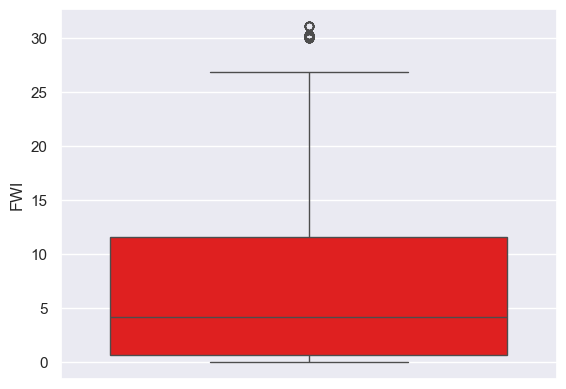

In [37]:
#Boxplot
ax = sns.boxplot(df['FWI'], color= 'red')

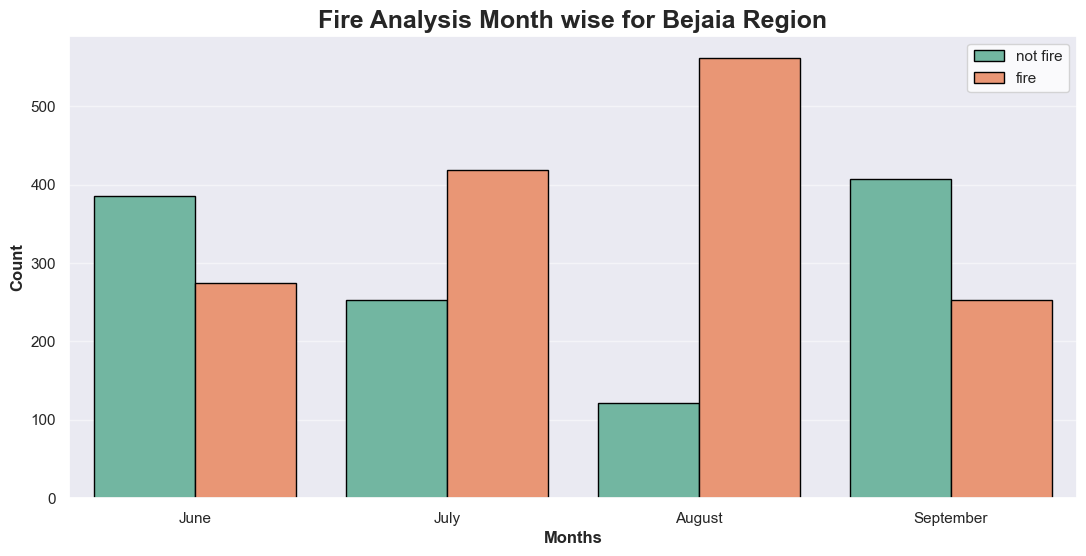

In [38]:
dftemp= df.loc[df['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

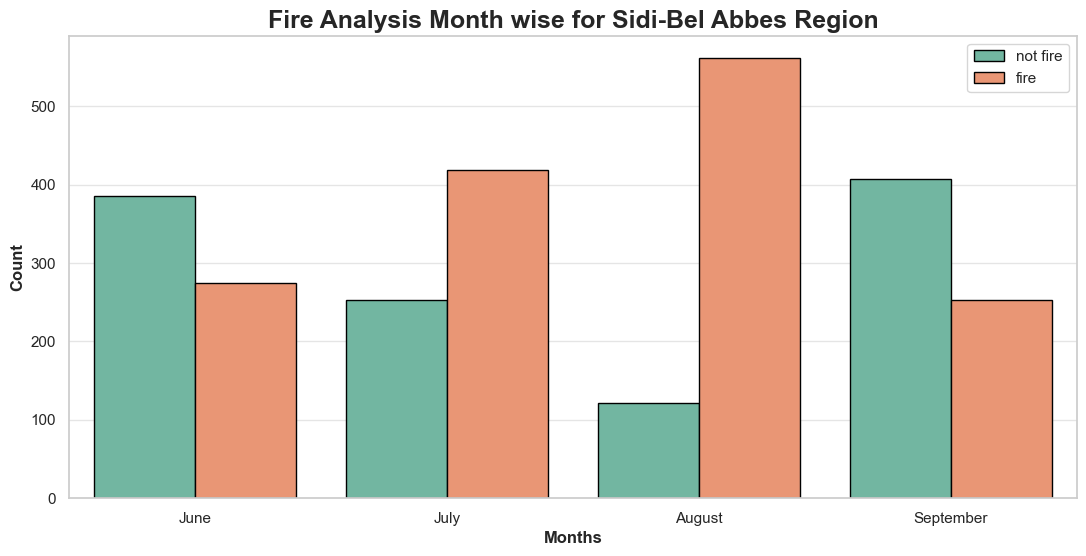

In [39]:
dftemp= df.loc[df['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

In [40]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [41]:
def barchart(feature,xlabel):
    plt.figure(figsize=[14,8])
    by_feature =  df1.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

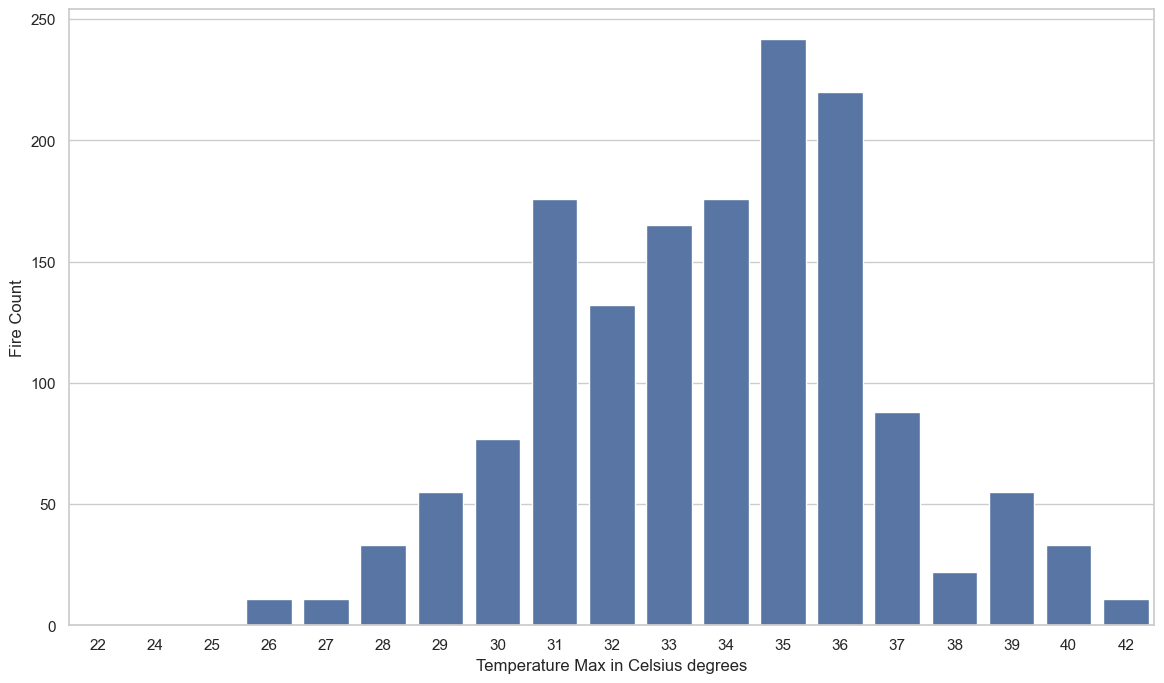

In [42]:
barchart('Temperature','Temperature Max in Celsius degrees')

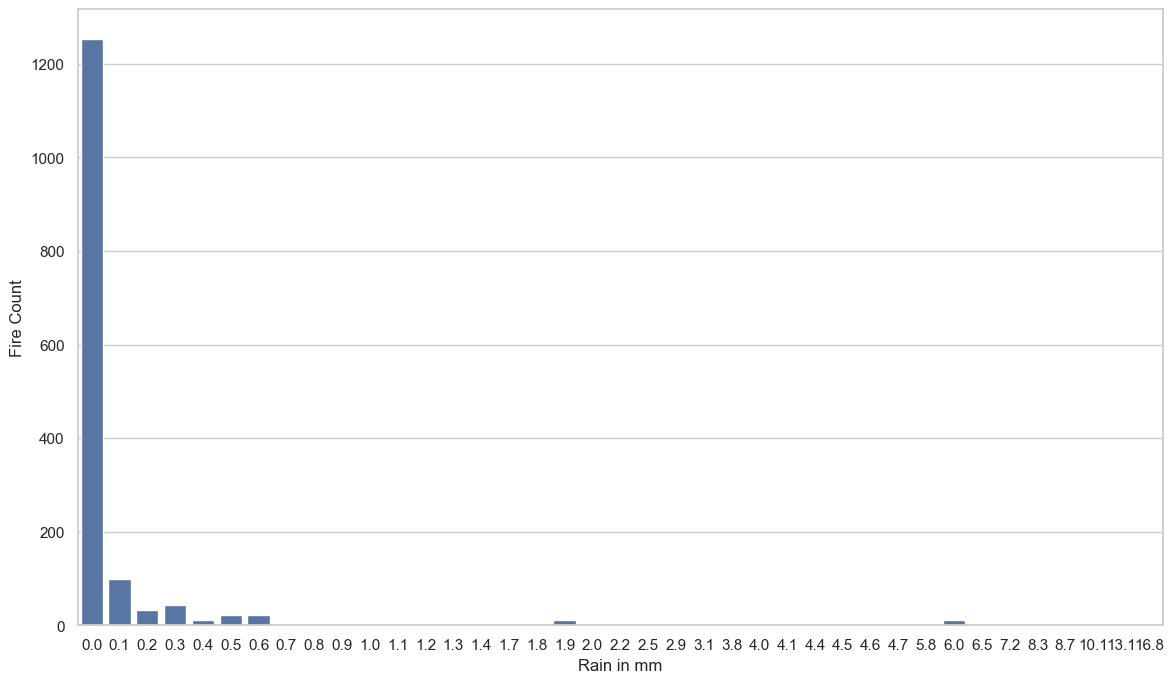

In [43]:
barchart('Rain', 'Rain in mm')

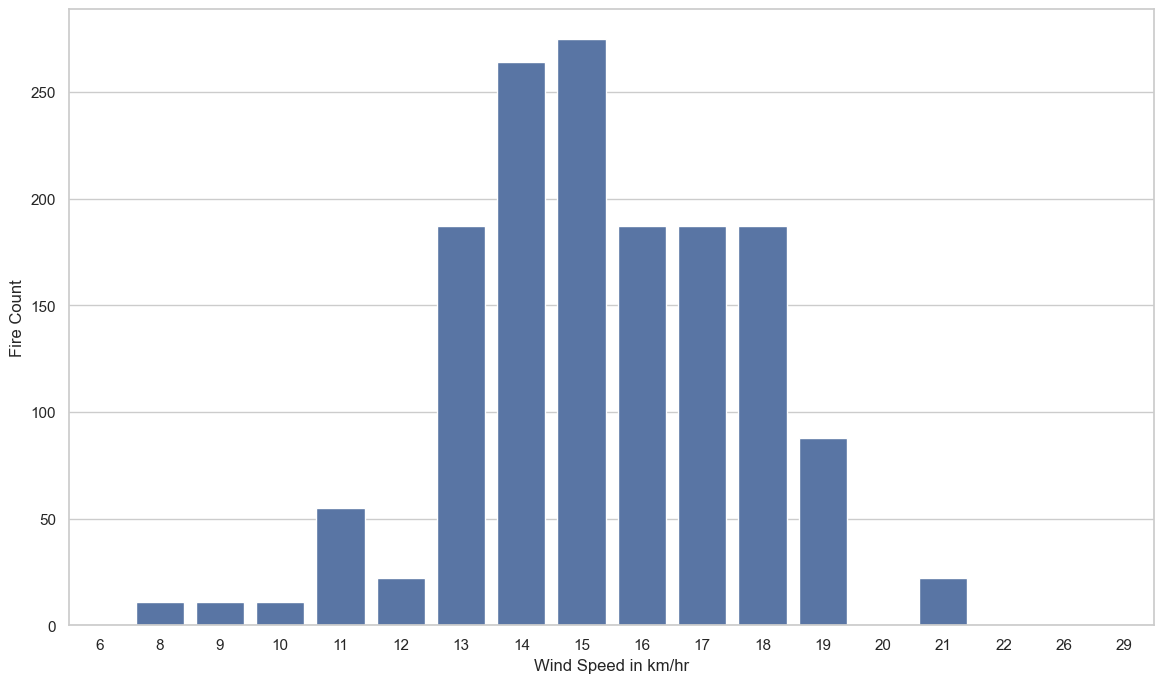

In [44]:
barchart('Ws', 'Wind Speed in km/hr')

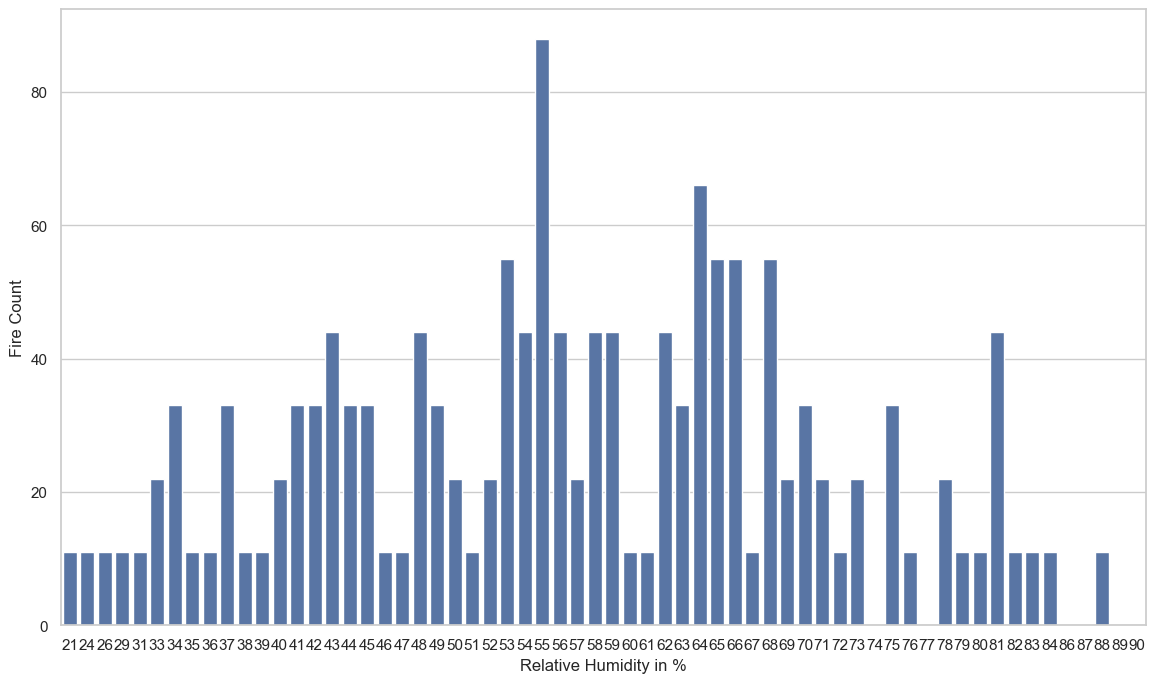

In [45]:
barchart('RH','Relative Humidity in %')

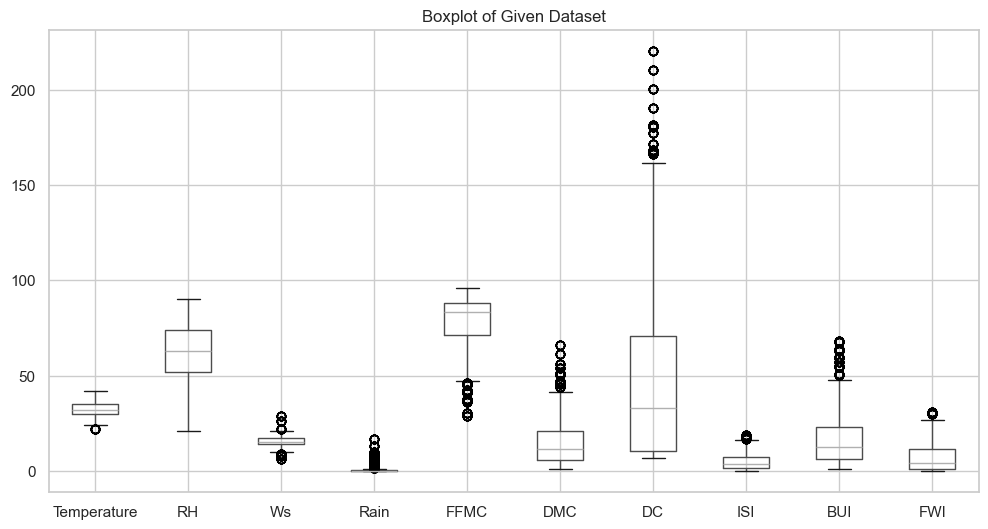

In [46]:
dftemp = df1.drop(['Classes', 'Region'], axis=1)
fig = plt.figure(figsize =(12, 6))
ax = dftemp.boxplot()
ax.set_title("Boxplot of Given Dataset")
plt.show()

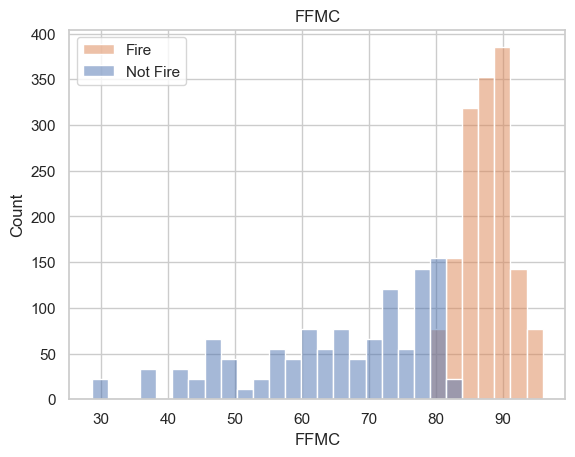

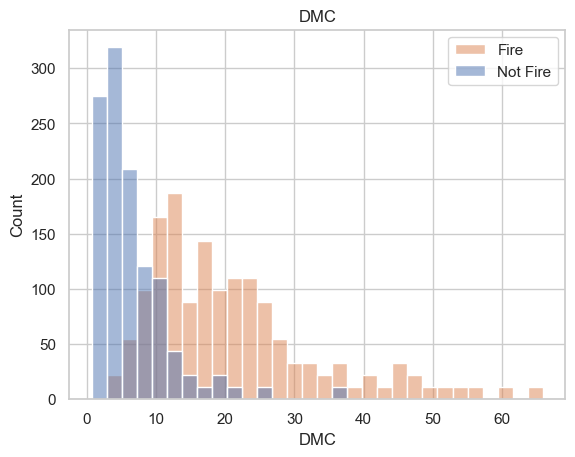

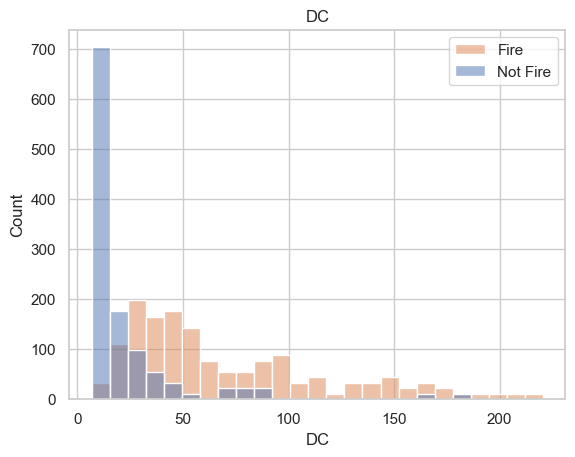

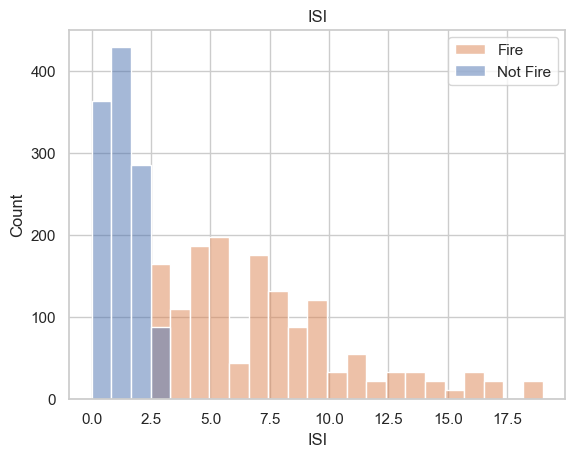

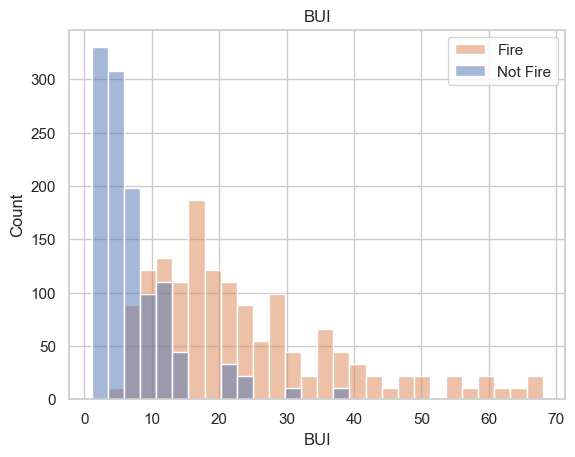

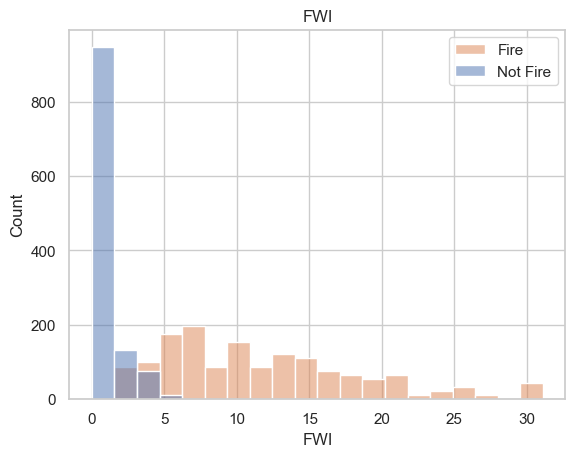

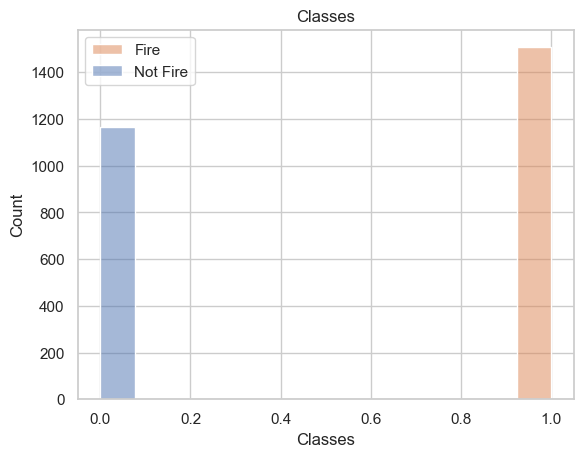

In [47]:
dftemp = dftemp = df1.drop(['Region','Temperature','Rain','Ws','RH'], axis=1)
for feature in dftemp:
    sns.histplot(data = dftemp,x=feature, hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()